In [1]:
import os

os.listdir("../data")

['archive.zip',
 'other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber Trip Analysis Machine Learning Project ( Data Analyst) (1).pdf',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("../data/uber-raw-data-janjune-15.csv")
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [5]:
df.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [6]:
df["Affiliated_base_num"].fillna("Unknown", inplace=True)
df.isnull().sum()

C:\Users\HOME\AppData\Local\Temp\ipykernel_2764\2285862385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Affiliated_base_num"].fillna("Unknown", inplace=True)


Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

In [7]:
df["Pickup_date"] = pd.to_datetime(df["Pickup_date"])
df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [8]:
df["hour"] = df["Pickup_date"].dt.hour
df["day"] = df["Pickup_date"].dt.day
df["month"] = df["Pickup_date"].dt.month
df["weekday"] = df["Pickup_date"].dt.day_name()
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,hour,day,month,weekday
0,B02617,2015-05-17 09:47:00,B02617,141,9,17,5,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,9,17,5,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,9,17,5,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,9,17,5,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,9,17,5,Sunday


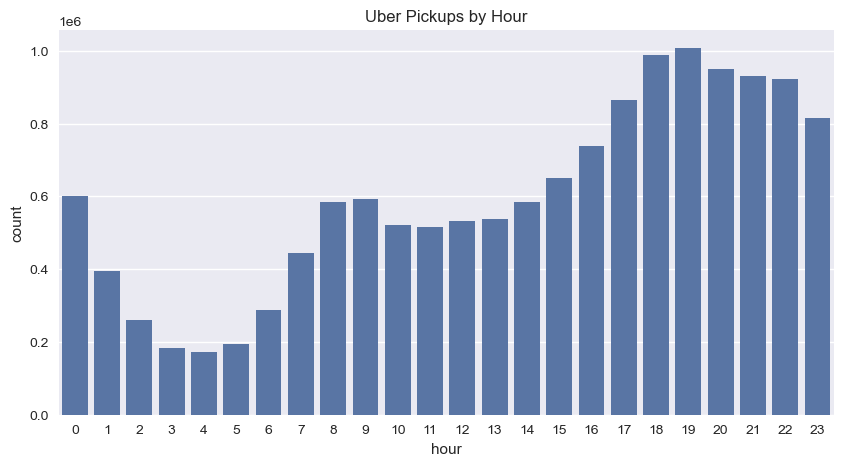

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df)
plt.title("Uber Pickups by Hour")
plt.show()

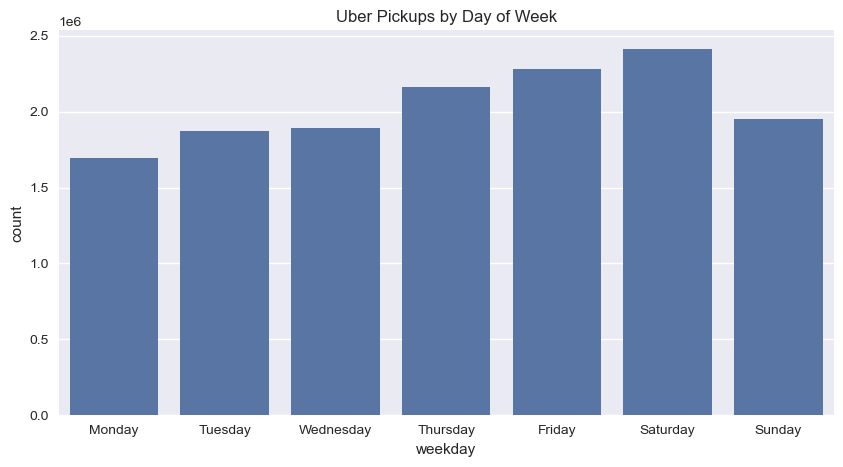

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="weekday", data=df,
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Uber Pickups by Day of Week")
plt.show()

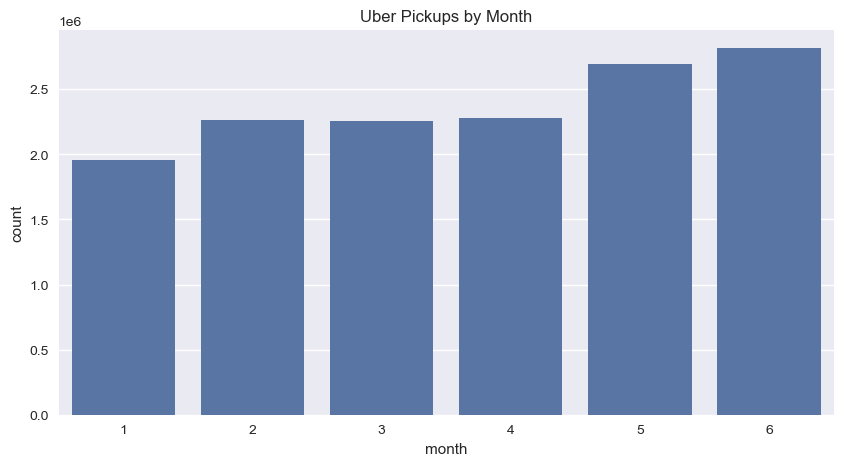

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="month", data=df)
plt.title("Uber Pickups by Month")
plt.show()

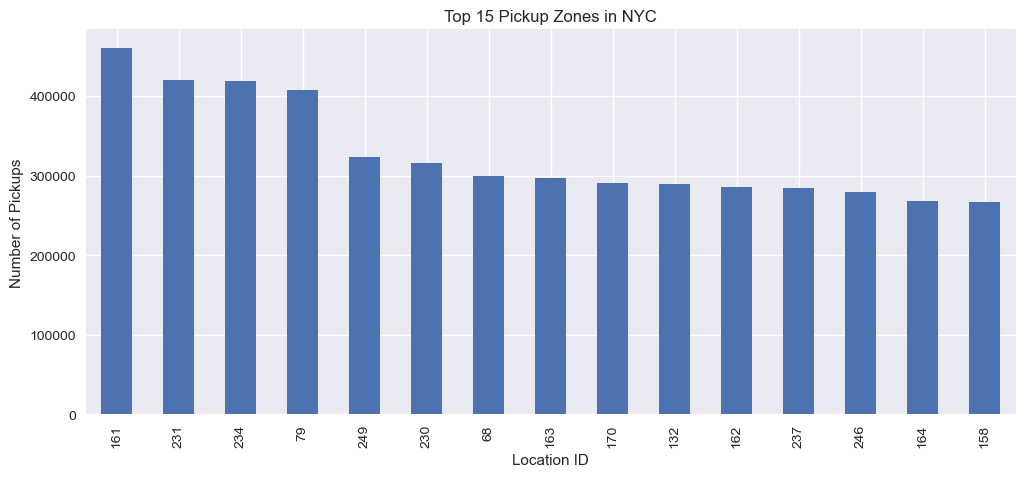

In [12]:
plt.figure(figsize=(12,5))
df['locationID'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Pickup Zones in NYC")
plt.xlabel("Location ID")
plt.ylabel("Number of Pickups")
plt.show()

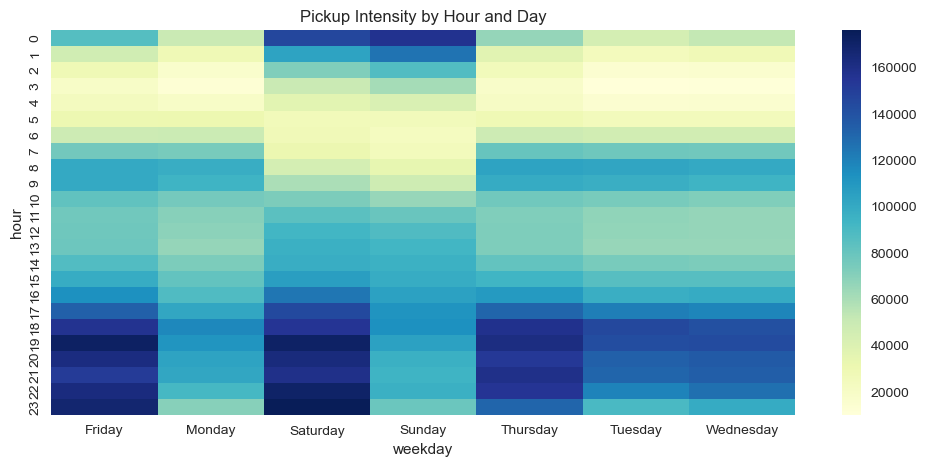

In [13]:
plt.figure(figsize=(12,5))
sns.heatmap(pd.crosstab(df['hour'], df['weekday']), cmap="YlGnBu")
plt.title("Pickup Intensity by Hour and Day")
plt.show()

# 🚖 Uber Trip Analysis Project

**Domain:** Transportation / Mobility  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook  

## 📌 Project Objective
The objective of this project is to analyze Uber trip data to identify pickup trends by hour, day, and month and to visualize demand patterns.

---

## 📊 Dataset Information
The dataset contains Uber pickup records including:
- Dispatching Base Number  
- Pickup Date  
- Affiliated Base Number  
- Location ID  

---

## 🧹 Data Cleaning
- Converted pickup_date to datetime format  
- Extracted hour, weekday, and month  
- Checked missing values  
- Removed/handled null values  

---

## 📈 Analysis Performed
- Hour-wise Uber pickup analysis  
- Month-wise Uber pickup analysis  
- Zone/location based analysis  
- Pickup intensity heatmap by hour and weekday  

---

## 📌 Key Insights
- Uber demand increases significantly after 5 PM  
- Peak demand occurs between **6 PM – 11 PM**  
- **Friday and Saturday nights** have the highest number of pickups  
- Early morning hours have very low demand  

---

## ✅ Conclusion
This analysis helps Uber understand peak operating hours and allocate drivers efficiently to maximize revenue and reduce customer waiting time.